## TCC - Stock price prediction using machine learning algorithms based on Fundamentalist analysis

### Steps:
- Data preparation
    - Normalization
    - Error correction
    - NaN treatment
    - Outliers
    - Repetition
    - Check if data is good
    - Reduce dimensionality (PCA) (https://towardsdatascience.com/unsupervised-learning-dimensionality-reduction-ddb4d55e0757)
- Split data (trainning / test)
- Choosing a Model
    - Baseline (simple, benchmark)
    - More complex
    - Evaluation
- Discover best hyperparameters
- Parameter tuning
    - Learning rate
    - Cross validation (?)


-> Gathering data, preparing data, choosing model, training, evaluating, hyperparameter tuning, prediction <-
> tensor flow playground

https://www.kdnuggets.com/2018/05/general-approaches-machine-learning-process.html

https://towardsdatascience.com/machine-learning-general-process-8f1b510bd8af

https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

https://towardsdatascience.com/supervised-vs-unsupervised-learning-14f68e32ea8d


## Tratamento de dados



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()

In [2]:
# Reading CSV file and transposing
dataset = pd.read_csv('grendene-indicadores-financeiros.csv').transpose()

# Setting columns names as the data's first column and removing that column
dataset.columns = dataset.iloc[0]
dataset = dataset.iloc[5:,]

# Transforming index to datetime
dataset['Trimestre'] = pd.to_datetime(dataset.index.values)
dataset = dataset.set_index('Trimestre')

# Get columns from dataset, interate over every column and transfor type object => float
cols = dataset.columns
for col in cols:
    dataset[col] = dataset[col].astype(float)
    
dataset.head()

Unnamed: 0,LPA Lucro por Acao $,VPA Valor Patr por Acao$,Vendas por Acao $,EBITDA por Acao $,Divida Total Liquida $,Divida Total Bruta $,Divida Bruta / Atv Tt %,Divida Bruta / Pat Liq %,Divida Liq / Pat Liq %,Estr Cap (D/D+Pat Liq) %,...,ROIC (IC inicial) %,Invested Capital $,Rentab Invest Subsid %,Alavancagem Financ x,Alavancagem Operac x,Capex (incl invest) $,Depreciacao e amortiz $,Capex (inc inv)/Deprec %,Deprec / Imob e Intang %,Fluxo de caixa livre $
Trimestre,,,,,,,,,,,,,,,,,,,,,
2004-12-31,0.148932,0.821877,2.528626,0.417843,156042000.0,148643000.0,14.132357,20.095337,21.1,16.732821,...,17.951472,583647000.0,8.3,0.735776,2.985384,26874000.0,26894000.0,99.925634,15.623239,NaN
2005-03-31,0.106102,0.863609,1.899152,NaN,287898000.0,152073000.0,14.177701,19.565570,37.0,16.363883,...,18.226784,489350000.0,15.3,0.739636,3.016367,NaN,NaN,NaN,NaN,NaN
2005-06-30,0.065061,0.873736,1.539929,NaN,265759000.0,154284000.0,15.107102,19.619971,33.8,16.401920,...,16.062398,521358000.0,42.9,0.663055,3.371357,NaN,NaN,NaN,NaN,NaN
2005-09-30,0.071962,0.952314,1.268117,NaN,285149000.0,165287000.0,14.625175,19.284830,33.3,16.167043,...,13.244480,571934000.0,33.2,0.979153,3.465363,NaN,NaN,NaN,NaN,NaN
2005-12-31,0.093772,0.947297,1.173770,0.170268,307976000.0,176130000.0,15.223819,20.658787,36.1,17.121660,...,14.293458,544591000.0,17.0,1.434441,3.287077,42941000.0,26842000.0,159.976902,15.845617,254085000.0


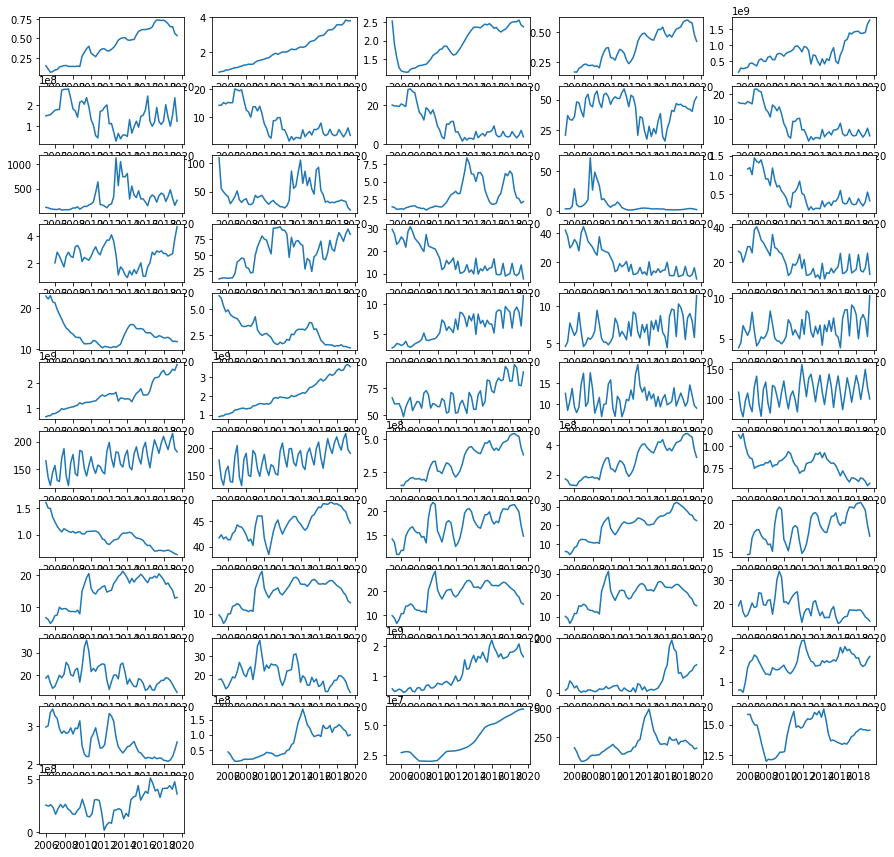

In [23]:
plt.rcParams["figure.figsize"] = (15,15)
for i in range(1, 57):
    plt.subplot(12, 5, i)
    plt.plot(dataset.iloc[:,i-1])

In [30]:
# It's possible to see that the data values seem to have a trend, but no seasonality. In this case, the missing 
# data will be handles using Interpolation
dataset.interpolate(method='linear', axis=0, inplace=True)
dataset.head(10)

Unnamed: 0,LPA Lucro por Acao $,VPA Valor Patr por Acao$,Vendas por Acao $,EBITDA por Acao $,Divida Total Liquida $,Divida Total Bruta $,Divida Bruta / Atv Tt %,Divida Bruta / Pat Liq %,Divida Liq / Pat Liq %,Estr Cap (D/D+Pat Liq) %,...,ROIC (IC inicial) %,Invested Capital $,Rentab Invest Subsid %,Alavancagem Financ x,Alavancagem Operac x,Capex (incl invest) $,Depreciacao e amortiz $,Capex (inc inv)/Deprec %,Deprec / Imob e Intang %,Fluxo de caixa livre $
Trimestre,,,,,,,,,,,,,,,,,,,,,
2004-12-31,0.148932,0.821877,2.528626,0.417843,156042000.0,148643000.0,14.132357,20.095337,21.1,16.732821,...,17.951472,583647000.0,8.3,0.735776,2.985384,26874000.0,26894000.0,99.925634,15.623239,NaN
2005-03-31,0.106102,0.863609,1.899152,0.355949,287898000.0,152073000.0,14.177701,19.565570,37.0,16.363883,...,18.226784,489350000.0,15.3,0.739636,3.016367,30890750.0,26881000.0,114.938451,15.678834,NaN
2005-06-30,0.065061,0.873736,1.539929,0.294055,265759000.0,154284000.0,15.107102,19.619971,33.8,16.401920,...,16.062398,521358000.0,42.9,0.663055,3.371357,34907500.0,26868000.0,129.951268,15.734428,NaN
2005-09-30,0.071962,0.952314,1.268117,0.232162,285149000.0,165287000.0,14.625175,19.284830,33.3,16.167043,...,13.244480,571934000.0,33.2,0.979153,3.465363,38924250.0,26855000.0,144.964085,15.790023,NaN
2005-12-31,0.093772,0.947297,1.173770,0.170268,307976000.0,176130000.0,15.223819,20.658787,36.1,17.121660,...,14.293458,544591000.0,17.0,1.434441,3.287077,42941000.0,26842000.0,159.976902,15.845617,254085000.0
2006-03-31,0.099011,0.993100,1.151100,0.167978,429948000.0,179115000.0,15.011012,20.039942,48.1,16.694395,...,16.707637,463842000.0,24.4,1.614638,3.214032,34624000.0,27303000.0,126.813903,15.847762,244201000.0
2006-06-30,0.131567,1.039060,1.139701,0.199952,442764000.0,180243000.0,15.085810,19.274152,47.3,16.159538,...,19.275603,492390000.0,8.2,1.669735,2.943125,21636000.0,27692000.0,78.130868,15.313407,258184000.0
2006-09-30,0.140957,1.081906,1.136898,0.211174,395001000.0,274020000.0,20.039608,28.141705,40.6,21.961394,...,18.745471,578714000.0,0.5,1.831308,2.813460,12379000.0,27615000.0,44.827087,14.975109,230033000.0
2006-12-31,0.149379,1.088760,1.209850,0.229708,352009000.0,278752000.0,19.674246,28.447449,35.9,22.147150,...,21.769574,627875000.0,5.4,1.777487,2.880225,12195000.0,27108000.0,44.986720,14.975141,167214000.0


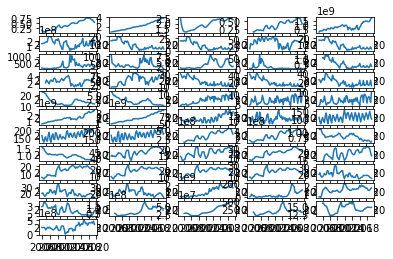

In [4]:
for i in range(1, 57):
    plt.subplot(12, 5, i)
    plt.plot(dataset.iloc[:,i-1])

## Sequential Forward Feature Selection